# **本节重点**

1. 券商模拟器Broker的介绍
2. Broker成交价格的设定
3. Broker成交量的设定
4. Broker内置的方法和属性

# **1. 券商模拟器Broker的介绍**

## **Broker概念**

在Backtrader的世界中，为了模拟现实中的交易代理，存在一个叫Broker的模块，这个模块可以用来管理资金账户、现金、订单、设置本金等等，几乎和现实中的券商、期货公司等一模一样。

Backtrader所提供的Broker有很多种类型，一种是回测专用的broker，这个也是我们平时研究环节所用的最多的；另一种是真实的实盘Broker模块，由于backtrader是一个国外的框架，它内置的实盘broker也是对接的国外的券商系统，我们在国内交易无法使用，每个券商所提供的交易接口、行情接口都是不一样的，因此，在技术方面如果要对接券商系统，那么就需要根据券商提供的接口手册进行相应的开发，每家券商都要开发不同的Broker模块。但是国内的期货公司的柜台系统是免费开放的，只要根据柜台接口手册就可以完成开发，最著名的就是ctp。

在国外，有很多券商都提供了自己的行情/交易接口，投资者可以很方便的通过自己的程序进行接入；但是在国内，个人接入券商的交易系统比较困难，目前没有券商愿意提供接口给个人投资者使用，更多是提供给机构，比如公募基金、私募基金等，并且交易费率也各不相同，同时，券商对于接入自己系统的机构也有一些要求，比如交易的频率、换手率要达到一定的标准才行，如果一家机构接入券商交易系统后，一直不产生交易手续费，券商是不愿意长期合作的。

因此，我们的Backtrader回测主要用在研究的环节，如果是低频策略，可以选择手工交易，如果频率较高，实盘自动化交易我们未来会使用别的框架，比如qmt，ptrade或者掘金量化系统。

## **期货交易柜台**

依据国内监管要求，客户无法直连交易所系统，中间必须经过**期货公司（Broker）的系统**，这便是**柜台系统**。

期货公司会有多套柜台系统，在功能上可以分为：
- 主席
- 次席

主席系统功能全面，支持出入金，盘后结算等，讲究的是高吞吐量与高可靠性，一般客户都是在主席系统上交易。

**例如CTP (Comprehensive Transaction Platform, 综合交易平台)即是上期所子公司上期技术开发的一套主席系统**。

次席系统一般只做下单及撤单用，讲究的是低延迟穿透时间，一般为对时延要求较高的客户准备。

对于同时报出的相同订单，次席的单子会先到达交易所撮合。不过报单如何最快地到达交易所是由很多因素所决定的，穿透时间的测试也有很多学问，后面我会单独分享一系列低延迟交易系统研究。

柜台系统一般都会提供API（Application Programming Interface，应用程序编程接口）给程序化客户接入柜台使用。CTP API是CTP系统提供的编程接口，可以在上期技术官网直接下载得到。

![盘口](images/柜台.png)

### **程序化登录信息**
客户如果需要调用API接入柜台进行程序化交易，登录时需要一些基本信息，如下：

**1. BrokerID**

简称期商编码，是指该期货公司在CTP系统上的编码，为四位数。例如海通期货是8000。

**2. TradeFront, MarketFront**

TradeFront是指CTP系统的交易前置IP地址，客户用来连接下单撤单等；MarketFront是指行情前置IP地址，用来订阅收取行情。

**3. InvestorID（UserID,InvestUnitID）**

投资者代码，是指该客户在CTP系统上的唯一ID，在期货公司开户后由期货公司分配得到。UserID是操作员代码，InvestUnitID是投资单元代码，普通投资者遇到要填这两个值的，直接填InvestorID即可。

**4.Password**

开户时设置的密码。需要注意的是开户完首次登录CTP系统需要修改密码，在期货公司官网上下载快期客户端登录，点修改密码就可以。

**5.AppID**

客户终端软件代码。

**6.AuthCode**

客户终端软件认证码。

**说明：**

以上1和2对于一家期货公司同一套系统的所有客户都是一样的。

开户时在哪家期货公司就用哪家期货公司的信息，如果开户时没有得到，可以查看期货公司页面或咨询客服得到。

5和6信息是为了配合穿透式监管


什么是穿透式监管  https://www.wolai.com/6xHSd37Trp7jK1na1RinUM

## **模拟仿真**
仿真系统有两种，一种是期货公司提供的，这类后台基本是连接对应的交易所的测试环境，可以询问期货公司是否提供；

另一种是上期技术提供的产品**simnow** https://www.simnow.com.cn

**Simnow仿真环境主要分为两部分**：

- 第一部分是**CTP柜台系统**，与生产环境相同。客户可以直接使用官网下载得到的CTP API在simnow测试，然后无缝对接到期货公司生产环境；
- 第二部分是**模拟交易所系统**，目前这是上期技术基于上期所系统自己开发的模拟交易所，并非真正的对应的五个交易所的测试环境。



在simnow上仿真交易也需要上述第二节中提到的登录信息。

1和2可以从simnow主页产品与服务页面获取。这里有两套环境，注意看下面的服务时间，第一套与实际生产同步，只在交易日交易时间段提供服务。

3和4可以从simnow主页右上角注册账号，注册成功后即可收到短信获取。

5和6在simnow是默认统一的，即APPID为simnow_client_test，认证码为0000000000000000（16个0）。

提示：

填写账号信息时，柜台选择选“标准CTP”。
收到的短信中的账号密码即登录系统的InvestorID和Password，首次登录时需要修改密码，可以在simnow主页上点击修改密码。
注册成功后将会得到200万模拟资金，如果资金亏完后可以去官网上入金。

# **2. Broker中成交价格的设定**

### **2.1 以订单创建日的收盘价成交**

cerebro.broker.set_coc(True)

### **2.2 以当日开盘价成交**

cerebro.broker.set_coo(True)

或

bt.Cerebro(cheat_on_open=True)

### **2.3 默认情况是当日收盘下单，下一日的开盘成交**

# **3. 成交量的设定**

默认情况下，Broker 在撮合成交订单时，不会将订单上的购买数量与成交当天 bar 的总成交量 volume 进行对比，即使购买数量超出了当天该标的的总成交量，也会按购买数量全部撮合成交，显然这种“无限的流动性”是不现实的，这种 “不考虑成交量，默认全部成交” 的交易模式，也会使得回测结果与真实结果产生较大偏差。

如果想要修改这种默认模式，可以通过 Backtrader 中的 **fillers 模块**来限制实际成交量，fillers 会告诉 Broker 在各个成交时间点应该成交多少量，一共有 3 种形式：

### **3.1 形式1：bt.broker.fillers.FixedSize(size)**

通过 FixedSize() 方法设置最大的固定成交量：size，该种模式下的成交量限制规则如下： 订单实际成交量的确定规则：取（size、订单执行那天的 volume 、订单中要求的成交数量）中的最小者； 订单执行那天，如果订单中要求的成交数量无法全部满足，则只成交部分数量。 设置方式如下：

# 通过 BackBroker() 类直接设置
cerebro = Cerebro()
filler = bt.broker.fillers.FixedSize(size=xxx)
newbroker = bt.broker.BrokerBack(filler=filler)
cerebro.broker = newbroker
# 通过 set_filler 方法设置
cerebro = Cerebro()
cerebro.broker.set_filler(bt.broker.fillers.FixedSize(size=xxx))

### **3.2 形式2：bt.broker.fillers.FixedBarPerc(perc)**

通过 FixedBarPerc(perc) 将 订单执行当天 bar 的总成交量 volume 的 perc % 设置为最大的固定成交量，该模式的成交量限制规则如下： 订单实际成交量的确定规则：取 （volume * perc /100、订单中要求的成交数量） 的 最小者； 订单执行那天，如果订单中要求的成交数量无法全部满足，则只成交部分数量。 设置方式如下：

# 通过 BackBroker() 类直接设置
cerebro = Cerebro()
filler = bt.broker.fillers.FixedBarPerc(perc=xxx)
newbroker = bt.broker.BrokerBack(filler=filler)
cerebro.broker = newbroker
# 通过 set_filler 方法设置
cerebro = Cerebro()
cerebro.broker.set_filler(bt.broker.fillers.FixedBarPerc(perc=xxx))
# perc 以 % 为单位，取值范围为[0.0,100.0]

### **3.3 形式3：bt.broker.fillers.BarPointPerc(minmov=0.1, perc=70)**

使用方法如下（假设在策略里创建了100股买单self.buy(size=100)，后面2根bar的总成交量分别为90、80）

filler = bt.broker.fillers.BarPointPerc(minmov=0.1, perc=70)
cerebro.broker.set_filler(filler) 
cerebro.run()

BarPointPerc 在考虑了价格区间的基础上确定成交量，在订单执行当天，成交量确定规则为：

通过 minmov 将 当天 bar 的价格区间 low ~ high 进行均匀划分，得到划分的份数：

part = (high -low +minmov) // minmov （向下取整）

再对当天 bar 的总成交量 volume 也划分成相同的份数 part ，这样就能得到每份的平均成交量：

volume_per = volume // part

最终，volume_per * （perc / 100）就是允许的最大成交量，实际成交时，对比订单中要求的成交量，就可以得到最终实际成交量
实际成交量 = min ( volume_per * （perc / 100）, 订单中要求的成交数量 )

# **4.Broker内置的方法和属性**

## **主要的Broker方法**

**set_cash(cash)**

Sets the cash parameter (alias: setcash)

**get_cash()**

Returns the current cash (alias: getcash)

**get_value(datas=None, mkt=False, lever=False)** 

Returns the portfolio value of the given datas (if datas is None, then the total portfolio value will be returned (alias: getvalue), datas表示所有股票，可以传入self.datas[3]

**set_checksubmit(checksubmit)**

Sets the checksubmit parameter

**set_filler(filler)**

Sets a volume filler for volume filling execution

**set_coc(coc)**

Configure the Cheat-On-Close method to buy the close on order bar

**set_coo(coo)**

Configure the Cheat-On-Open method to buy the close on order bar

**set_fundstartval(fundstartval)**

Set the starting value of the fund-like performance tracker

**set_slippage_perc(perc, slip_open=True, slip_limit=True, slip_match=True, slip_out=False)**

Configure slippage to be percentage based

**set_slippage_fixed(fixed, slip_open=True, slip_limit=True, slip_match=True, slip_out=False)**

Configure slippage to be fixed points based

**get_orders_open(safe=False)**

Returns an iterable with the orders which are still open (either not executed or partially executed

The orders returned must not be touched.

If order manipulation is needed, set the parameter safe to True

**getcommissioninfo(data)**

Retrieves the CommissionInfo scheme associated with the given data

**setcommission(commission=0.0, margin=None, mult=1.0, commtype=None, percabs=True, stocklike=False, interest=0.0, interest_long=False, leverage=1.0, automargin=False, name=None)**

This method sets a  CommissionInfo object for assets managed in the broker with the parameters. Consult the reference for CommInfoBase

If name is None, this will be the default for assets for which no other CommissionInfo scheme can be found


**addcommissioninfo(comminfo, name=None)**


Adds a CommissionInfo object that will be the default for all assets if name is None

**getposition(data)**

Returns the current position status (a Position instance) for the given data

**get_fundshares()**

Returns the current number of shares in the fund-like mode

**get_fundvalue()**

Returns the Fund-like share value

**add_cash(cash)**

Add/Remove cash to the system (use a negative value to remove)

# **5.样例**

## **5.1 导入依赖包**

In [4]:
import backtrader as bt
import tushare as ts
import pandas as pd
import akshare as ak
from backtrader.feeds import PandasData
from datetime import datetime as dt
import warnings
from datetime import datetime
import quantstats as qs

import talib as ta   # 这里需要安装talib， 在不同环境中的安装可以看课程下一个视频

from backtrader.feeds import GenericCSVData

warnings.filterwarnings("ignore")

## **5.2 定义两个不同细节的均线策略**

##### **但是这次我们要修改一些细节，让回测更加贴合实际**


size = int(self.broker.getvalue() / self.data.open[1] // 100 * 100)

set_checksubmit(False)

len(self.data) < self.data.buflen()

**size的计算说明**：假设我们有5449的资金，当前股价35元每股

In [5]:
5449 / 35

155.68571428571428

In [6]:
5449 / 35 // 100

1.0

In [7]:
5449 / 35 // 100 * 100

100.0

#### **版本一**

In [8]:
class SmaCrossV1(bt.Strategy):
    # 定义参数
    params = dict(period=5  # 移动平均期数
                  )

    def __init__(self):
        # 移动平均线指标
        self.move_average = bt.ind.MovingAverageSimple(self.datas[0].close, period=self.params.period)  #self.p.period

    def next(self):
        
        size = int(self.broker.getvalue() / self.datas[0].close // 100 * 100)  # 股数
        if not self.position.size:  # 还没有仓位
            # 当日收盘价上穿5日均线，创建买单，全仓买入
            if self.datas[0].close[-1] < self.move_average.sma[
                -1] and self.datas[0].close[0] > self.move_average.sma[0]:
                self.buy(size=size)
        # 有仓位，并且当日收盘价下破5日均线，创建卖单，全仓卖出
        elif self.datas[0].close[-1] > self.move_average.sma[-1] and self.datas[
            0].close[0] < self.move_average.sma[0]:
            self.close()

#### **版本二**

**len(self.data)** 会随着next的处理不断增加，表示已经处理的长度

**data.buflen()** 是静态的，表示的是价格、指标序列的总长

#### **注意： 上面的len(self.data)不能写成len(self.datas)，但是可以写成len(self.datas[0])**

In [9]:
class SmaCrossV2(bt.Strategy):
    # 定义参数
    params = dict(period=5  # 移动平均期数
                  )

    def __init__(self):
        # 移动平均线指标
        self.move_average = bt.ind.MovingAverageSimple(self.datas[0].close, period=self.params.period)  #self.p.period

    def next(self):
        if len(self.data) >= self.data.buflen(): 
            # 当前已处理的数据已经大于等于总数据量，防止下面的self.data.open[1]报错，我们直接返回
            return
        size = int(self.broker.getvalue() / self.data.open[1] // 100 * 100)  # 股数
        if not self.position.size:  # 还没有仓位
            # 当日收盘价上穿5日均线，创建买单，全仓买入
            if self.datas[0].close[-1] < self.move_average.sma[
                -1] and self.datas[0].close[0] > self.move_average.sma[0]:
                self.buy(size=size)
        # 有仓位，并且当日收盘价下破5日均线，创建卖单，全仓卖出
        elif self.datas[0].close[-1] > self.move_average.sma[-1] and self.datas[
            0].close[0] < self.move_average.sma[0]:
            self.close()

In [10]:
start_date = '20150101'
end_date   = '20230101'
symbol     = '000001' 

## **使用Pandas作为数据源**

In [11]:
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=symbol, period="daily", start_date=start_date, end_date=end_date, adjust="hfq")
stock_zh_a_hist_df.rename(columns={'日期':'date','开盘':'open','收盘':'close','最高':'high','最低':'low','成交量':'volume','换手率':'turnover'},inplace=True)
stock_zh_a_hist_df = stock_zh_a_hist_df[['date', 'open', 'high', 'low', 'close', 'volume']]
stock_zh_a_hist_df.date=pd.to_datetime(stock_zh_a_hist_df.date)
stock_zh_a_hist_df.head()

,date,open,high,low,close,volume
0,2015-01-05,1797.18,1829.92,1753.17,1800.57,2860436
1,2015-01-06,1781.38,1842.33,1747.52,1773.48,2166421
2,2015-01-07,1748.65,1779.13,1719.31,1739.62,1700121
3,2015-01-08,1741.88,1749.78,1674.16,1680.93,1407714
4,2015-01-09,1674.16,1783.64,1652.72,1694.48,2508500


In [12]:
stock_data = PandasData(
                dataname=stock_zh_a_hist_df,
                datetime=0,  # 日期列
                open=1,  # 开盘价所在列
                high=2,  # 最高价所在列
                low=3,  # 最低价所在列
                close=4,  # 收盘价所在列
                volume=5,
                fromdate=dt.strptime(start_date, '%Y%m%d'),  # 起始日  dt.strptime(start, '%Y%m%d')
                todate=dt.strptime(end_date, '%Y%m%d'),  # 结束日
            )

初始市值: 1000000.00
最终市值: 1739123.00


                           Strategy
-------------------------  ----------
Start Period               2015-01-05
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             58.0%

Cumulative Return          73.91%
CAGR﹪                     4.9%

Sharpe                     0.45
Prob. Sharpe Ratio         89.52%
Smart Sharpe               0.43
Sortino                    0.71
Smart Sortino              0.69
Sortino/√2                 0.5
Smart Sortino/√2           0.49
Omega                      1.12

Max Drawdown               -35.46%
Longest DD Days            816
Volatility (ann.)          20.95%
Calmar                     0.14
Skew                       0.96
Kurtosis                   10.24

Expected Daily %           0.03%
Expected Monthly %         0.58%
Expected Yearly %          7.16%
Kelly Criterion            4.94%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.13%
Expected Shortfall (cVaR)  -2.13%

Max Consecutive Wins       9


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-02-02,2022-11-04,2022-12-30,697,-35.458351,-35.044880
2,2015-04-17,2016-02-25,2017-07-10,816,-21.039835,-19.699547
3,2017-11-23,2018-08-14,2019-02-28,463,-20.067205,-19.904511
4,2019-10-15,2020-04-03,2020-07-03,263,-14.301582,-13.394560
5,2015-01-16,2015-03-10,2015-04-07,82,-13.600000,-13.261500


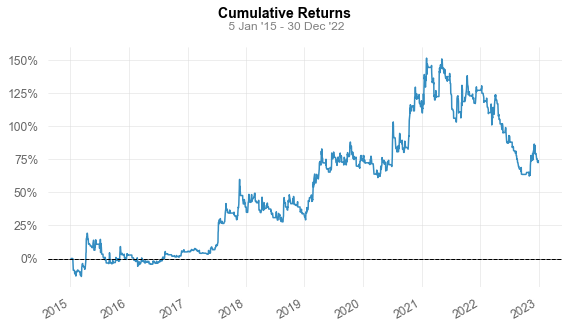

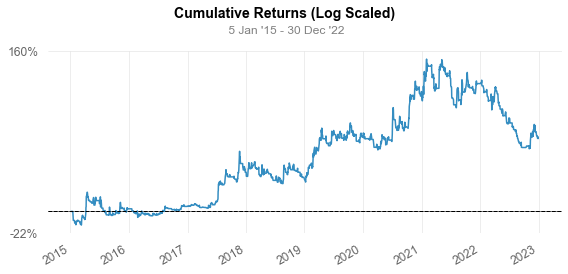

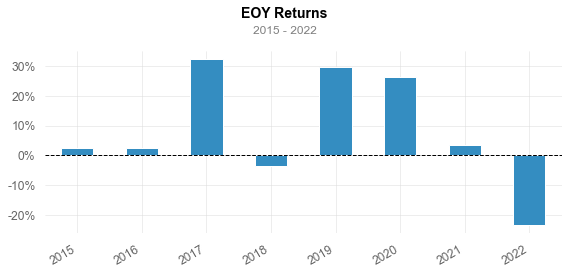

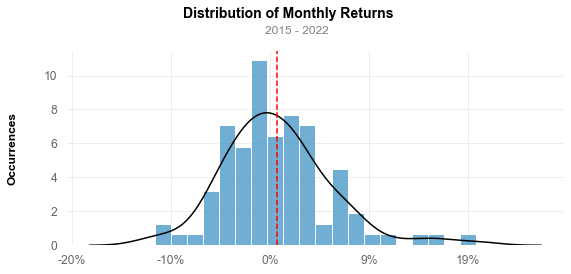

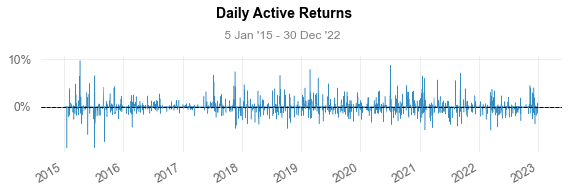

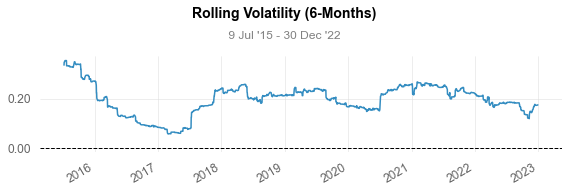

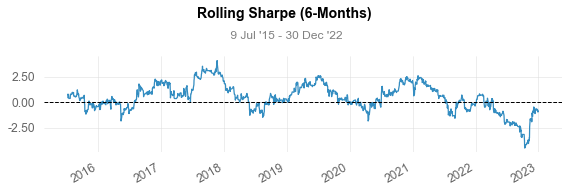

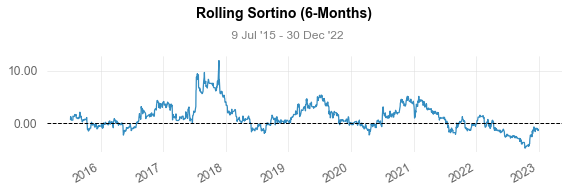

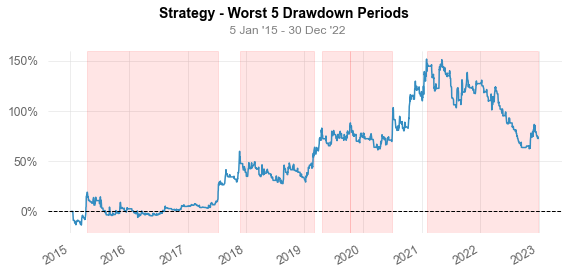

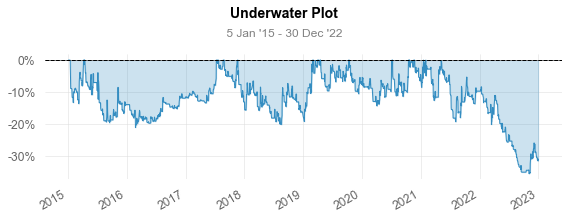

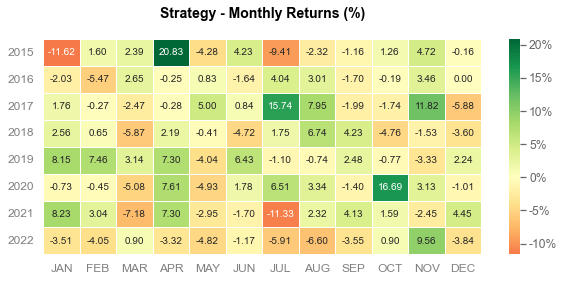

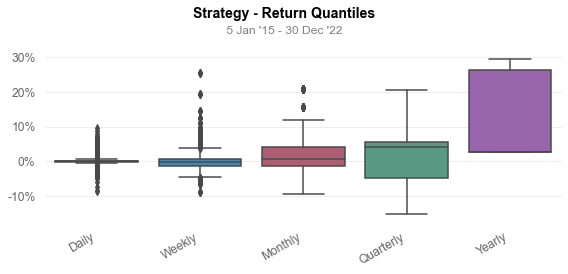

In [13]:
cerebro = bt.Cerebro()


cerebro.adddata(stock_data, name='stock')
start_cash=1000000
cerebro.addstrategy(SmaCrossV1)
# 设置现金
cerebro.broker.setcash(start_cash)

# 新增加set_checksubmit，并且设为False
# cerebro.broker.set_checksubmit(False)

cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')

print('初始市值: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]

portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, _,_,_ = portfolio_stats.get_pf_items()

returns.index=returns.index.tz_convert(None)
print('最终市值: %.2f' % cerebro.broker.getvalue())
# logger.info(f'================================= 回测结束 {dt.now().strftime("%Y%m%d %H:%M:%S")} =========================================')
qs.reports.full(returns)

初始市值: 1000000.00
最终市值: 1551596.00


                           Strategy
-------------------------  ----------
Start Period               2015-01-05
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             59.0%

Cumulative Return          55.16%
CAGR﹪                     3.87%

Sharpe                     0.38
Prob. Sharpe Ratio         85.39%
Smart Sharpe               0.36
Sortino                    0.59
Smart Sortino              0.58
Sortino/√2                 0.42
Smart Sortino/√2           0.41
Omega                      1.1

Max Drawdown               -36.23%
Longest DD Days            816
Volatility (ann.)          20.99%
Calmar                     0.11
Skew                       0.94
Kurtosis                   10.3

Expected Daily %           0.02%
Expected Monthly %         0.46%
Expected Yearly %          5.64%
Kelly Criterion            4.17%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.14%
Expected Shortfall (cVaR)  -2.14%

Max Consecutive Wins       9


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-05-10,2022-11-04,2022-12-30,600,-36.225087,-35.824670
2,2017-11-23,2019-01-08,2019-04-01,495,-23.306392,-21.933107
3,2015-04-17,2016-02-25,2017-07-10,816,-21.039835,-19.699547
4,2019-10-15,2020-04-03,2020-07-03,263,-14.768530,-13.819860
5,2015-01-16,2015-03-10,2015-04-07,82,-13.600000,-13.261500


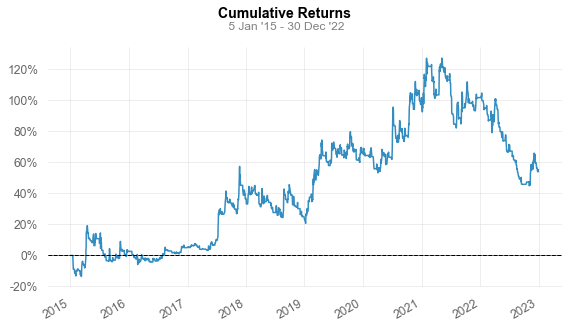

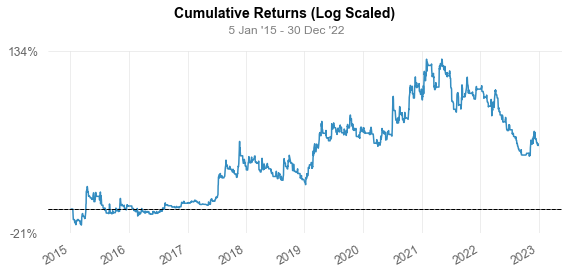

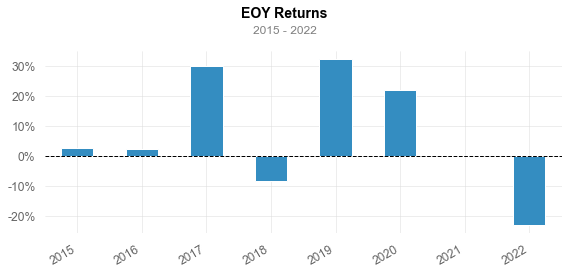

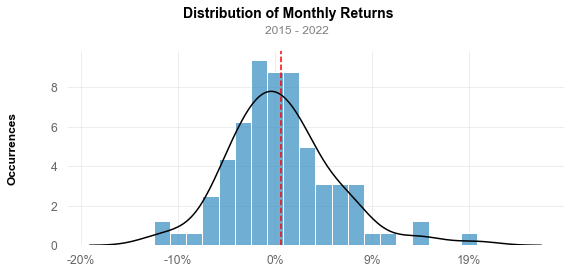

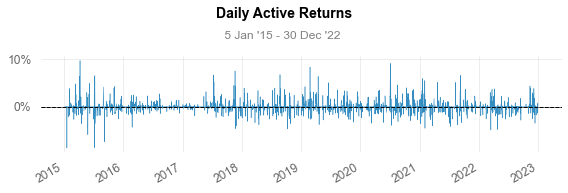

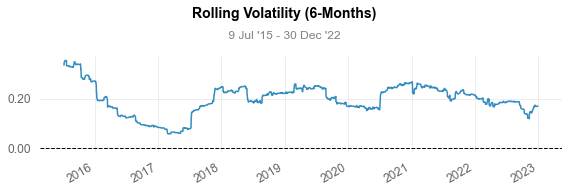

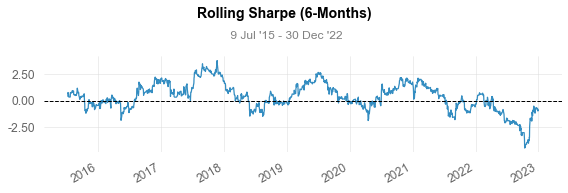

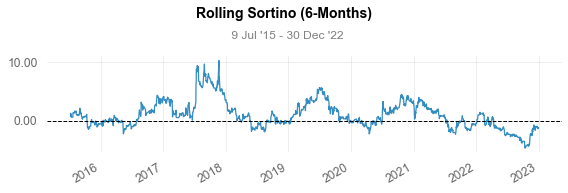

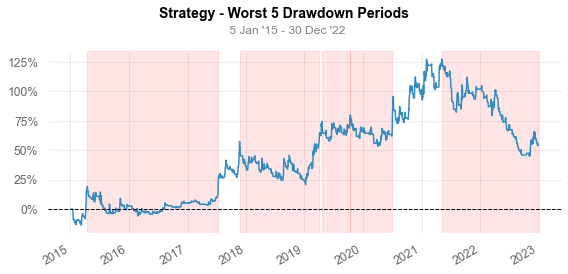

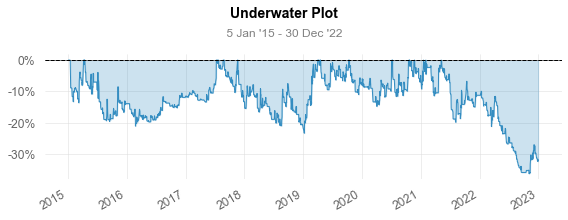

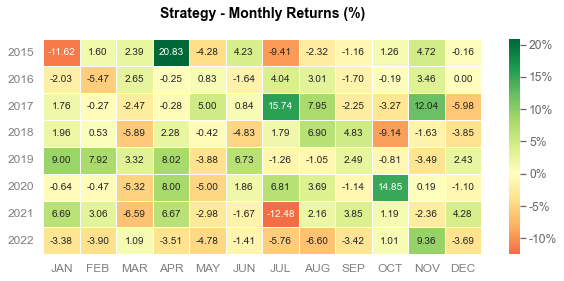

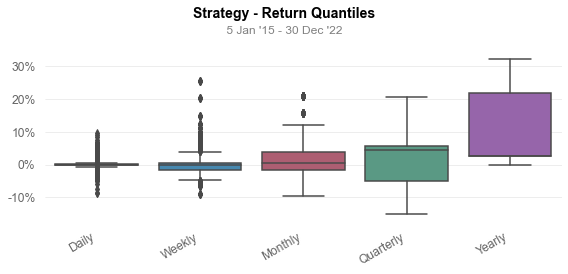

In [14]:
cerebro = bt.Cerebro()


cerebro.adddata(stock_data, name='stock')
start_cash=1000000
cerebro.addstrategy(SmaCrossV2)
# 设置现金
cerebro.broker.setcash(start_cash)

# 新增加set_checksubmit，并且设为False
cerebro.broker.set_checksubmit(False)

cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')

print('初始市值: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]

portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, _,_,_ = portfolio_stats.get_pf_items()

returns.index=returns.index.tz_convert(None)
print('最终市值: %.2f' % cerebro.broker.getvalue())
# logger.info(f'================================= 回测结束 {dt.now().strftime("%Y%m%d %H:%M:%S")} =========================================')
qs.reports.full(returns)